<a href="https://colab.research.google.com/github/prateekkate/Cousera-Getting-Started-With-Tensorflow-2/blob/main/Coding_Tutorial(Week_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [ ]:
# Build the Sequential feedforward neural network model

model = Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(16,activation='relu'),
                    Dense(16,activation='relu'),
                    Dense(10,activation='softmax')
                  ])

In [ ]:
#print model weights
#It will give you error if you dont give input shape to the model
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[ 0.08291605,  0.06849572, -0.01110332, ...,  0.05549654,
          0.03365374,  0.0725356 ],
        [ 0.04623383, -0.00356882,  0.0543382 , ...,  0.02801197,
          0.06844513,  0.0351579 ],
        [ 0.01427946, -0.01232867,  0.00876231, ..., -0.08237679,
          0.08506338,  0.00132287],
        ...,
        [-0.02140495,  0.05917989, -0.0469724 , ..., -0.06370935,
          0.02745281,  0.01798052],
        [-0.0723028 ,  0.00720228,  0.05241223, ..., -0.02419218,
         -0.03228645, -0.02156189],
        [ 0.05785361, -0.06364468, -0.0751862 , ...,  0.0770584 ,
          0.06511983, -0.03980104]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense_4/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[ 0.09355083, -0.19125044,  0.06328082, -0.066

In [ ]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [ ]:
# Build the Sequential convolutional neural network model
model = Sequential([
                    Conv2D(16, kernel_size=3, activation='relu', input_shape=(28,28,1), data_format='channels_last'),
                    MaxPooling2D(pool_size=3),
                    Flatten(),
                    Dense(16,activation='relu'),
                    Dense(10,activation='softmax')
                  ])


In [ ]:
# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                16400     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                170       
Total params: 16,730
Trainable params: 16,730
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [ ]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Print the resulting model attributes
print(model.optimizer)
print(model.optimizer.lr)
print(model.loss)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>
sparse_categorical_crossentropy


***
<a id="coding_tutorial_4"></a>
## The fit method

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [ ]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print the shape of the training data

train_images.shape , test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
test_labels.shape , train_labels.shape

((10000,), (60000,))

In [ ]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [ ]:
print(train_labels[8]) #Labels are provided as integers so we are using sparse_categorical_crossentropy loss.

5


In [ ]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

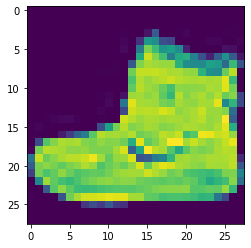

Ankle boot


In [ ]:
# Display one of the images
i=0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
x = train_labels[i]
print(labels[x])

#### Fit the model

In [ ]:
# Fit the model
history = model.fit(train_images[...,np.newaxis],train_labels,epochs=10,batch_size=512)


Epoch 1/10
118/118 [==============================] - 13s 110ms/step - loss: 0.3898 - accuracy: 0.8624
Epoch 2/10
118/118 [==============================] - 13s 108ms/step - loss: 0.3584 - accuracy: 0.8736
Epoch 3/10
118/118 [==============================] - 13s 108ms/step - loss: 0.3360 - accuracy: 0.8818
Epoch 4/10
118/118 [==============================] - 13s 108ms/step - loss: 0.3257 - accuracy: 0.8845
Epoch 5/10
118/118 [==============================] - 13s 108ms/step - loss: 0.3105 - accuracy: 0.8891
Epoch 6/10
118/118 [==============================] - 13s 109ms/step - loss: 0.3020 - accuracy: 0.8922
Epoch 7/10
118/118 [==============================] - 13s 109ms/step - loss: 0.2933 - accuracy: 0.8960
Epoch 8/10
118/118 [==============================] - 13s 108ms/step - loss: 0.2895 - accuracy: 0.8959
Epoch 9/10
118/118 [==============================] - 13s 108ms/step - loss: 0.2824 - accuracy: 0.8990
Epoch 10/10
118/118 [==============================] - 13s 107ms/step - l

#### Plot training history

In [ ]:
# Load the history into a pandas Dataframe
df =pd.DataFrame(history.history)
df

,loss,accuracy
0,0.389847,0.862400
1,0.358373,0.873567
2,0.336016,0.881767
3,0.325683,0.884500
4,0.310453,0.889100
5,0.301961,0.892233
6,0.293342,0.896017
7,0.289468,0.895883
8,0.282445,0.899000
9,0.280410,0.900167


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

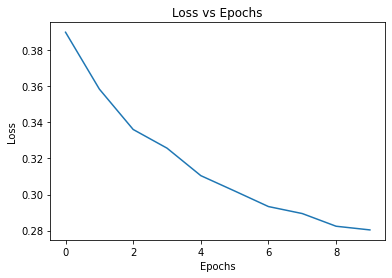

In [ ]:
# Make a plot for the loss
loss_plot = df.plot(y="loss", title = "Loss vs Epochs", legend=False)
loss_plot.set(xlabel="Epochs",ylabel="Loss")


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

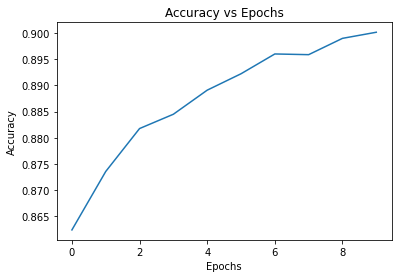

In [ ]:
# Make a plot for the accuracy

acc_plot = df.plot(y="accuracy", title = "Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs",ylabel="Accuracy")

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
# Evaluate the model

test_loss , test_acc = model.evaluate(test_images[...,np.newaxis],test_labels,verbose=2)

313/313 - 1s - loss: 0.3108 - accuracy: 0.8904


#### Make predictions from the model

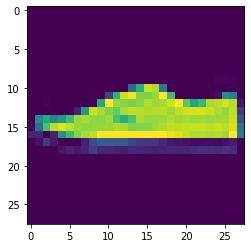

Label: Sneaker


In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions
predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
x = np.argmax(predictions)
print(labels[x])

Sneaker
